In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [20]:
copi = pd.read_csv('data/stavby.csv', encoding='utf-8') # construction production index

In [3]:
copi = copi[['hodnota', 'mesic', 'rok', 'mesicz', 'rokz' , 'casz_txt', 'stavprace_txt', 'oceneni_txt', 'ocisteni_txt']]
print(f'Before:\n{copi.dtypes}\n')
# todo stringy

Before:
hodnota          float64
mesic              int64
rok                int64
mesicz           float64
rokz               int64
casz_txt          object
stavprace_txt     object
oceneni_txt       object
ocisteni_txt      object
dtype: object



In [6]:
print(copi['casz_txt'].unique())
print(copi['oceneni_txt'].unique())
print(copi['ocisteni_txt'].unique())
print(copi['stavprace_txt'].unique())

['stejné období předchozího roku' 'průměr bazického roku']
['běžné ceny' 'stálé (průměrné) ceny roku']
['neočištěno' 'sezónně očištěno, včetně očištění o kalendářní vlivy'
 'očištěno o kalendářní vlivy, není očištěno o sezónní vlivy']
['Stavební práce celkem' 'Inženýrské stavitelství' 'Pozemní stavitelství']


In [7]:
total = copi[copi['stavprace_txt'] == 'Stavební práce celkem']

In [11]:
total = total[total['casz_txt'] == 'stejné období předchozího roku']
dirty = total[total['ocisteni_txt'] == 'neočištěno']
dirty = dirty[dirty['oceneni_txt'] == 'běžné ceny']

In [15]:
dirty.sort_values(['rok', 'mesic'], inplace=True)
dirty['datum'] = dirty['mesic'].astype(str) + '/' + dirty['rok'].astype(str)

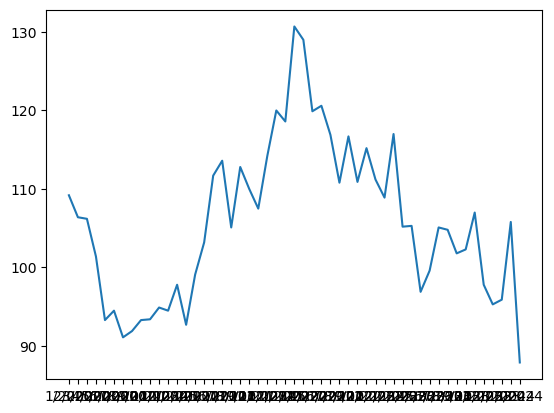

In [16]:
plt.plot(dirty['datum'], dirty['hodnota'])

In [21]:
copi['rok'].unique()

array([2020, 2021, 2022, 2023, 2024])